In [1]:
import sys
from pathlib import Path

import nltk
nltk.download('stopwords')

# Add the parent directory to sys.path
sys.path.append(str(Path.cwd().parent))

from application.use_cases.compute_word_cloud import ComputeWordCloud
from domain.entities.post import Post
from infrastructure.simple_wordcloud_projector import SimpleWordCloudProjector, WordCloudFormat

from wordcloud import WordCloud, STOPWORDS

print(STOPWORDS)

{'whom', 'yourself', 'there', "why's", "you'd", "what's", 'some', 'she', 'any', 'as', 'www', "you're", "i'd", 'through', 'up', 'r', 'than', 'ours', "it's", 'off', "weren't", "i'm", 'otherwise', 'shall', 'we', "wouldn't", 'for', 'himself', "i'll", 'however', 'the', "isn't", 'further', 'that', 'theirs', 'to', "can't", 'above', 'such', 'yours', 'down', 'our', 'just', 'their', 'before', "he'd", "she's", 'should', 'between', 'have', 'they', 'having', "they're", 'your', 'no', "you'll", "haven't", 'if', "when's", 'or', "they'll", 'where', 'then', 'does', 'her', "that's", 'be', 'over', 'had', 'while', 'each', "don't", 'since', 'k', "they've", "aren't", 'get', "where's", 'do', 'during', "hasn't", 'why', 'here', "let's", 'once', 'with', "we'd", 'these', 'from', 'how', 'his', 'a', "she'll", 'has', 'again', 'same', "here's", 'more', 'herself', 'of', 'after', "doesn't", 'not', 'myself', 'ourselves', 'which', 'those', 'cannot', 'all', 'can', 'doing', 'its', 'is', 'itself', 'him', 'and', 'else', 'onl

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/agarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Word Cloud from LinkedIn Saved Posts

This notebook loads posts from `linkedin-saved-posts.json`, generates a word cloud image, and displays it.

In [2]:
import json
from pathlib import Path

# Load posts from JSON file
json_path = Path("../playground/linkedin-saved-posts.json")
with open(json_path, encoding="utf-8") as f:
    data = json.load(f)

# Assume each item in data is a dict with a 'text' field (adapt if needed)
posts = [
    Post(
        id=str(i),
        author=post.get("author", ""),
        authorImage=post.get("authorImage", ""),
        authorHeadline=post.get("authorHeadline", ""),
        timestamp=post.get("timestamp", ""),
        text=post.get("text", ""),
        postImage=post.get("postImage", "")
    )
    for i, post in enumerate(data)
]

In [3]:
# Create the projector (you can change format/size as needed)
projector = SimpleWordCloudProjector(format=WordCloudFormat.PNG, width=600, height=300)
img_bytes = projector.compute_word_cloud(posts)


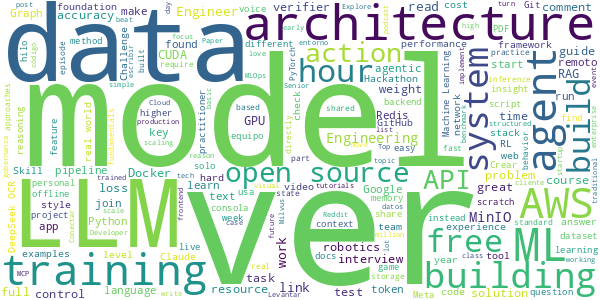

In [4]:
from PIL import Image
import io

# Display the image
image = Image.open(io.BytesIO(img_bytes))
display(image)